#I.A. Notebook

---


In [31]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

<function matplotlib.pyplot.show>

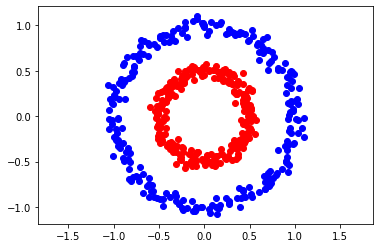

In [32]:
# capa de entrada
n = 500
p = 2

# ## Dataset
# X = []
# Y = []
# def fahrenheit(x):
#   return (x+9/5)+32

# for i in range(-500,500):
#   if i % 25 == 0:
#     X.append(i)
#     Y.append(fahrenheit(i))

# X = np.asarray(X)
# Y = np.asarray(Y)

# X.reshape(1,40)
# Y.reshape(1,40)

# X.reshape(40,1)
# X = X[: , np.newaxis]
# Y = Y[: , np.newaxis]

# print(X,Y)


X, Y = make_circles(n_samples=n,factor=0.5,noise=0.05)
Y = Y[:,np.newaxis]

plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1],c='blue')
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1],c='red')
plt.axis('equal')
plt.show

## Struct of Neural Layer

In [4]:
class neural_layer():
  def __init__(self,n_connect, n_neuron, f_act):
    self.f_act = f_act

    self.b = np.random.rand(1,n_neuron) * 2 - 1
    self.W = np.random.rand(n_connect, n_neuron) * 2 - 1

## Funcion de activacion:

$$ Sigmoide:  f(x) = \frac{1}{1 + e^{-x}}  $$
$$ \frac{d}{dx} : f'(x) = x * (1 - x)$$

In [5]:
f_act = (lambda x: 1 / (1 + np.e ** (-x)),
         lambda x: x * (1 - x))

## Funcion de coste:
$$Error~cuadratico~medio:$$
$$\frac{1}{n}\sum^{n}_{i=1}{(X_i-Y_i)}^{2}$$

In [6]:
f_cost = (lambda x, y: np.mean((x-y)**2),
          lambda x, y: (x-y))

## Creacion de red neuronal

In [7]:
def create_net(Topology, f_act):
  neural_net = []
  for l, layer in enumerate(Topology[:-1]):
    neural_net.append(neural_layer(Topology[l],Topology[l+1],f_act))
  return neural_net

Topology = [p, 2, 4, 4, 1]

## Entrenamiento de la red neuronal

In [17]:
# f_act =  (lambda x: x,
#           lambda x: 1)

neural_net = create_net(Topology, f_act)

def train(neural_net, X, Y, f_cost, lr=0.1, train=True):
  # Forward pass
  out = [(None,X)];
  for l,layer in enumerate(neural_net):
    SP = out[-1][1] @ neural_net[l].W + neural_net[l].b # Suma ponderada
    f_SP = neural_net[l].f_act[0](SP)           # Suma ponderada despues de funcion de activacion
    out.append((SP,f_SP))

  if train:
    # backward pass
    deltas = []
    for l in reversed(range(0, len(neural_net))):
      SP = out[l+1][0]
      f_SP = out[l+1][1]
      if l == len(neural_net) - 1:
        # calcular delta de la ultima capa
        deltas.insert(0, f_cost[1](f_SP,Y) * neural_net[l].f_act[1](f_SP) )
      else:
        # calcualar deltas de las demas capas
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].f_act[1](f_SP) )
      
      _W = neural_net[l].W
      
      # gredient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      # print("aqu",out[l][1].T @ deltas[0] *0.0001)
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

for i in range(1000):
  # print(neural_net[0].W, neural_net[0].b)
  predict = train(neural_net,X,Y ,f_cost,0.001,True)

print(f_cost[0](predict,Y)) 

# train(neural_net,X,Y ,f_cost,0.01,True)


0.2500059233164644


In [10]:
fahr = train(neural_net,[[15]],[[fahrenheit(15)]],f_cost,train=False)
print(fahr)
fahrenheit(15)

NameError: ignored

In [11]:
print(neural_net[0].W,neural_net[1].W)
print("ballas",neural_net[0].b,neural_net[1].b)

[[-0.75368102 -0.84997795]
 [-0.18104927  0.11087038]] [[ 0.2123764  -0.17591693  0.17610296  0.59655687]
 [-0.36849286  0.28870847 -0.19504541  0.04949934]]
ballas [[-0.11195058  0.20670943]] [[-0.14508803  0.52837956  0.31496974  0.60446159]]


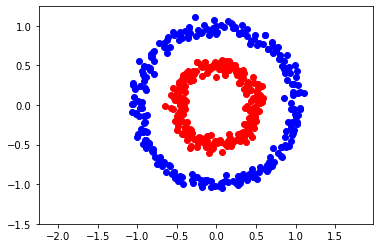

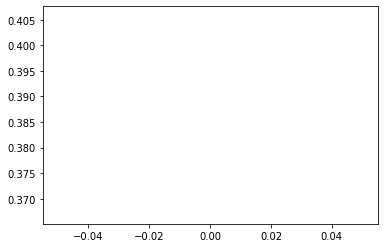

[[0.14305535 0.14305535 0.14305535 ... 0.14305535 0.14305535 0.14305535]
 [0.14305535 0.14305535 0.14305535 ... 0.14305535 0.14305535 0.14305535]
 [0.14305535 0.14305535 0.14305535 ... 0.14305535 0.14305535 0.14305535]
 ...
 [0.14305535 0.14305535 0.14305535 ... 0.14305535 0.14305535 0.14305535]
 [0.14305535 0.14305535 0.14305535 ... 0.14305535 0.14305535 0.14305535]
 [0.14305535 0.14305535 0.14305535 ... 0.14305535 0.14305535 0.14305535]]


In [30]:
import time
from IPython.display import clear_output

neural_net = create_net(Topology, f_act)

loss = []
for i in range(1):
  pY = train(neural_net, X,Y,f_cost)
  if i % 25 == 0:
    loss.append(f_cost[0](pY,Y))
    res = 50

    _x0 = np.linspace(-1.5,1.5,res)
    _x1 = np.linspace(-1.5,1.5,res)
    _Y = np.zeros((res,res))
    for i0,x0 in enumerate(_x0):
      for i1,x1 in enumerate(_x1):
        _Y[i0,i1] = train(neural_net,np.array([[x0,x1]]),Y,f_cost,train=False)[0][0]

    plt.pcolormesh(_x0,_x1,_Y,cmap="coolwarm")
    
    plt.axis("equal")
   
    plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1],c="blue")
    plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1],c="red")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()
    time.sleep(0.5)
    print(_Y)